## Хрусталева Мария Олеговна
## 17-AC
### Вариант 5


### Метеоритная защита земли

1. Определите местоположение появления метеорита с наибольшим количеством высвободившейся энергии.
2. Определите метеорит с максимальной и минимальной скоростью.
3. Определите место максимальной концентрации метеоритов.
4. Определите время года, в которое вероятность появления метеоритов максимальна. Постройте график.
5. Удалите строки данных, в которых для метеоритов не указана скорость. Выведите размер набора данных до и после удаления.
6. Построить график, на котором по оси ОХ отложено время суток, по OY–частота появления метеоритов.
7. Заполните строки в которых для метеоритов не указана скорость.
8. Определите месяц года, для которого появление метеоритов наиболее вероятно (постройте необходимые графики).
9. Вычислите корреляцию Пирсона и Спирмена между признаками Altitude и TotalRadiatedEnergy. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("cneos_fireball_data.csv", header=0, names=["date_time", 
                                                             "latitude",
                                                             "longitude",
                                                             "altitude",
                                                             "velocity",
                                                             "vx",
                                                             "vy",
                                                             "vz",
                                                             "total_radiated_energy",
                                                             "calculated_total_impact_energy"])
data

,date_time,latitude,longitude,altitude,velocity,vx,vy,vz,total_radiated_energy,calculated_total_impact_energy
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.190
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.120
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.230
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.290
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.520
...,...,...,...,...,...,...,...,...,...,...
714,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092
715,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130
716,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400
717,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200


In [3]:
data.head()

,date_time,latitude,longitude,altitude,velocity,vx,vy,vz,total_radiated_energy,calculated_total_impact_energy
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.19
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.12
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.23
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.29
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.52


In [4]:
data.tail()

,date_time,latitude,longitude,altitude,velocity,vx,vy,vz,total_radiated_energy,calculated_total_impact_energy
714,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092
715,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130
716,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400
717,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200
718,1988-04-15 03:03:10,4.1S,124.3E,NaN,NaN,NaN,NaN,NaN,7.580000e+12,14.000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date_time                       719 non-null    object 
 1   latitude                        539 non-null    object 
 2   longitude                       539 non-null    object 
 3   altitude                        307 non-null    float64
 4   velocity                        157 non-null    float64
 5   vx                              157 non-null    float64
 6   vy                              157 non-null    float64
 7   vz                              157 non-null    float64
 8   total_radiated_energy           719 non-null    float64
 9   calculated_total_impact_energy  719 non-null    float64
dtypes: float64(7), object(3)
memory usage: 56.3+ KB


In [6]:
data.describe()

,altitude,velocity,vx,vy,vz,total_radiated_energy,calculated_total_impact_energy
count,307.000000,157.000000,157.000000,157.000000,157.000000,7.190000e+02,719.000000
mean,36.511726,17.950318,0.310828,-2.388535,-1.031847,8.812462e+11,1.387638
std,10.649462,6.057382,10.825425,11.415896,10.419010,1.405769e+13,16.598496
min,15.200000,9.800000,-35.400000,-43.500000,-28.700000,2.000000e+10,0.073000
25%,29.600000,13.700000,-7.300000,-11.200000,-9.100000,3.300000e+10,0.110000
50%,35.200000,16.900000,0.100000,-2.300000,0.300000,6.800000e+10,0.220000
75%,40.700000,19.800000,9.100000,4.800000,6.700000,1.510000e+11,0.440000
max,74.000000,49.000000,21.500000,25.800000,23.700000,3.750000e+14,440.000000


In [7]:
data.dropna()

,date_time,latitude,longitude,altitude,velocity,vx,vy,vz,total_radiated_energy,calculated_total_impact_energy
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.12
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.23
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.29
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.52
5,2017-06-20 13:41:32,54.2S,133.0E,33.3,13.6,8.7,-5.7,8.8,6.360000e+11,1.60
...,...,...,...,...,...,...,...,...,...,...
450,2004-04-22 04:21:49,44.3S,83.3E,29.6,16.3,8.5,-12.1,-6.8,6.240000e+11,1.50
451,2004-04-06 03:24:49,12.0S,162.8E,35.0,25.6,10.5,-23.2,-2.9,4.330000e+11,1.10
462,2003-11-10 13:54:06,64.5S,136.2E,23.0,20.1,14.8,-8.7,10.4,5.180000e+11,1.30
467,2003-09-27 12:59:02,21.0N,86.6E,26.0,18.2,-1.0,-5.4,-17.3,2.150000e+12,4.60


In [8]:
data.drop_duplicates()

,date_time,latitude,longitude,altitude,velocity,vx,vy,vz,total_radiated_energy,calculated_total_impact_energy
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.190
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.120
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.230
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.290
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.520
...,...,...,...,...,...,...,...,...,...,...
714,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092
715,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130
716,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400
717,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200


In [9]:
data.shape

(719, 10)

## 1. Определите местоположение появления метеорита с наибольшим количеством высвободившейся энергии.

In [10]:
idx_max_energy=data["total_radiated_energy"].idxmax()
print("Latitude (deg.) - " + data["latitude"][idx_max_energy] +
     "\nLongitude (deg.) - " + data["longitude"][idx_max_energy])

Latitude (deg.) - 54.8N
Longitude (deg.) - 61.1E


## 2. Определите метеорит с максимальной и минимальной скоростью.

In [11]:
meteorite_max_velosity=data["velocity"].max()
meteorite_min_velosity=data["velocity"].min()
print("Meteorite with max velocity\n")
print(data.query("velocity==@meteorite_max_velosity"))
print("\nMeteorite with min velocity\n")
print(data.query("velocity==@meteorite_min_velosity"))

Meteorite with max velocity

              date_time latitude longitude  altitude  velocity   vx    vy  \
67  2015-07-04 01:40:11    38.6N    103.1E      46.3      49.0  0.9 -40.4   

      vz  total_radiated_energy  calculated_total_impact_energy  
67 -27.7           5.600000e+10                            0.18  

Meteorite with min velocity

               date_time latitude longitude  altitude  velocity   vx   vy  \
300  2008-07-01 17:40:19    37.1N    115.7W      36.1       9.8  2.8  1.7   

      vz  total_radiated_energy  calculated_total_impact_energy  
300 -9.2           3.600000e+10                            0.12  


## 3. Определите место максимальной концентрации метеоритов.

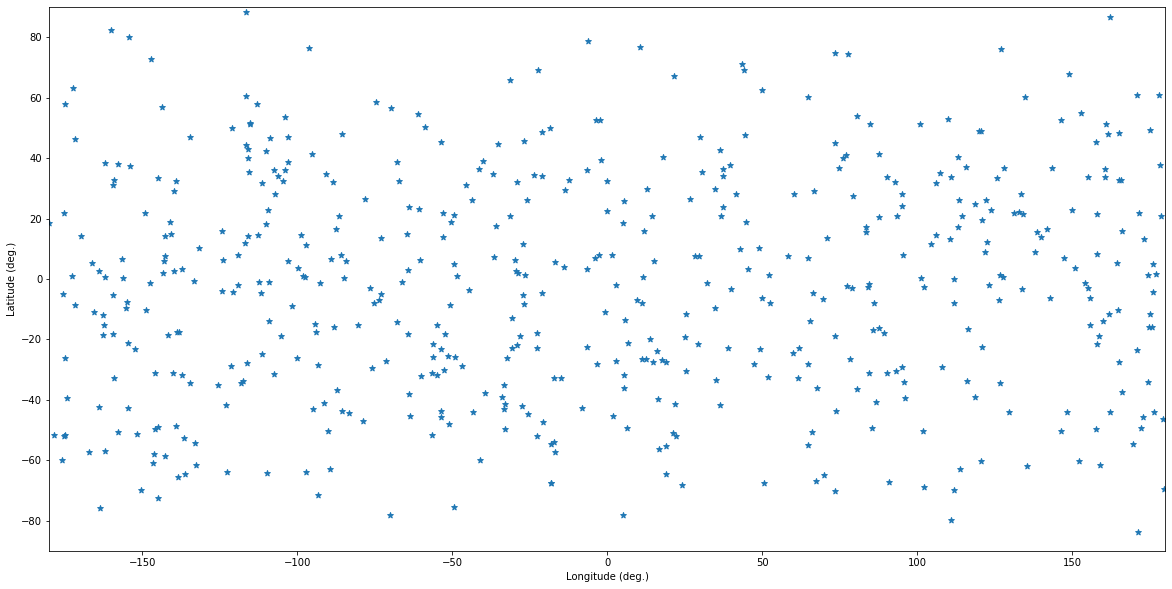

In [12]:
new_df=data.copy()
new_df.dropna(subset=['latitude','longitude'], inplace=True)

new_df['latitude'] = new_df.apply(lambda df: float(df.latitude[:-1]) if \
                                  df.latitude[-1]=='N' else -float(df.latitude[:-1]), axis=1)
new_df['longitude'] = new_df.apply(lambda df: float(df.longitude[:-1]) if \
                                   df.longitude[-1]=='W' else -float(df.longitude[:-1]), axis=1)

m_map = plt.figure(figsize=(20,10))
plt.scatter(new_df.longitude,new_df.latitude, marker='*')

plt.xlim(-180, 180)
plt.ylim(-90, 90)

plt.xlabel('Longitude (deg.)')
plt.ylabel('Latitude (deg.)')

plt.show()

## 4. Определите время года, в которое вероятность появления метеоритов максимальна. Постройте график.

autumn    0.253129
spring    0.250348
winter    0.248957
summer    0.247566
Name: season, dtype: float64
autumn is the time of year when probability of a meteorites is max


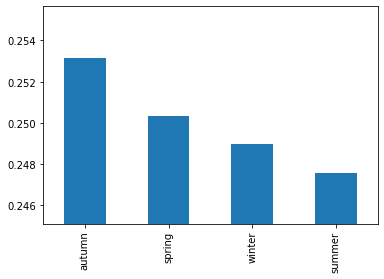

In [13]:
import re
def determine_season(date_time):
    
    month=int(re.search(r'-\d+-',date_time).group().strip("-"))
    return "winter" if month in [12,1,2] \
            else "spring" if month in [3,4,5] \
            else "summer" if month in [6,7,8] \
            else  "autumn"

data["season"]=data["date_time"].apply(determine_season)
probabilitys_series=data.season.value_counts(normalize=True)
print(probabilitys_series)
print("{} is the time of year when probability of a meteorites is max".format( \
    probabilitys_series.idxmax()))
probabilitys_series.plot(kind='bar', ylim=(probabilitys_series.min()*0.99, probabilitys_series.max()*1.01))

## 5. Удалите строки данных, в которых для метеоритов не указана скорость. Выведите размер набора данных до и после удаления.


In [14]:
print(data.shape)
copy_data=data.dropna(axis=0,subset=["velocity"])
print(copy_data.shape)


(719, 11)
(157, 11)


## 6. Построить график, на котором по оси ОХ отложено время суток, по OY–частота появления метеоритов.

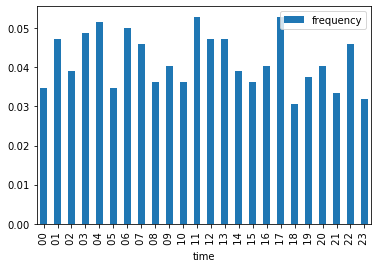

In [15]:
new_df=data.copy()
new_df["hour"]=new_df.date_time.apply(lambda dt: re.search(r' \d+:', dt).group().strip(':'))

graf_1=pd.DataFrame({'frequency': 
                   new_df.hour.value_counts(normalize=True),
                  'time': new_df.hour.value_counts(normalize=True).index})
graf_1.sort_values(by=['time'], inplace=True)
graf_1.plot(kind='bar', x='time', y='frequency')


## 7. Заполните строки в которых для метеоритов не указана скорость.


In [16]:
max_component=max(data.vx.max(), data.vy.max(), data.vz.max())
min_component=min(data.vx.min(), data.vy.min(), data.vz.min())

data.vx.fillna((max_component - min_component) * np.random.random_sample() + min_component,
                              inplace=True)
data.vy.fillna((max_component - min_component) * np.random.random_sample() + min_component,
                              inplace=True)
data.vz.fillna((max_component - min_component) * np.random.random_sample() + min_component,
                              inplace=True)

data.velocity.fillna(np.sqrt(data[data.velocity.isnull()].vx**2+\
                             data[data.velocity.isnull()].vy**2+\
                             data[data.velocity.isnull()].vz**2), inplace=True)
data

,date_time,latitude,longitude,altitude,velocity,vx,vy,vz,total_radiated_energy,calculated_total_impact_energy,season
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,24.447339,22.73805,-0.958133,8.92947,5.800000e+10,0.190,summer
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.200000,-0.40000,8.700000,-14.80000,3.500000e+10,0.120,summer
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.700000,-10.00000,-6.500000,-6.80000,7.300000e+10,0.230,summer
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.200000,10.90000,-9.700000,4.20000,9.400000e+10,0.290,summer
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.300000,17.70000,13.100000,-10.30000,1.840000e+11,0.520,summer
...,...,...,...,...,...,...,...,...,...,...,...
714,1993-11-29 17:48:41,26.5N,78.3E,NaN,24.447339,22.73805,-0.958133,8.92947,2.600000e+10,0.092,autumn
715,1993-10-31 03:39:27,51.3N,100.9W,NaN,24.447339,22.73805,-0.958133,8.92947,4.000000e+10,0.130,autumn
716,1991-10-04 09:22:47,78.7N,6.3E,NaN,24.447339,22.73805,-0.958133,8.92947,5.500000e+11,1.400,autumn
717,1990-10-01 03:51:47,7.5N,142.8E,NaN,24.447339,22.73805,-0.958133,8.92947,2.500000e+12,5.200,autumn


## 8. Определите месяц года, для которого появление метеоритов наиболее вероятно (постройте необходимые графики).


October is the month of the year for which meteorites are most likely
Probability - 0.09040333796940195


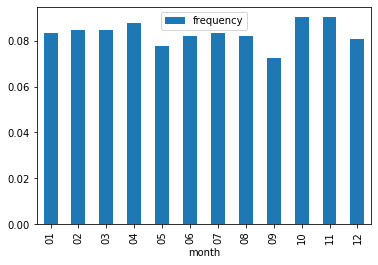

In [17]:
new_df=data.copy()
months={ 1:'January',
         2:'February',
         3:'March',
         4:'April',
         5:'May',
         6:'June',
         7:'July',
         8:'Auqust',
         9:'September',
         10:'October',
         11:'Nobember',
         12:'December',}
new_df["month"]=new_df.date_time.apply(lambda dt: re.search(r'-\d+-',dt).group().strip("-"))

series=new_df.groupby(by=['month'])['month'].count()
print('{} is the month of the year for which meteorites are most likely'.format(months[int(series.idxmax())]))
print('Probability - {}'.format(series.max()/data.shape[0]))
graf=pd.DataFrame(series.values/data.shape[0], columns=['frequency'], index=series.index)

graf.plot(kind='bar')


## 9. Вычислите корреляцию Пирсона и Спирмена между признаками Altitude и TotalRadiatedEnergy. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.

In [18]:
from scipy.stats import pearsonr as prs
data.dropna(subset=['altitude','total_radiated_energy'], inplace=True)
prs_corr, prs_pvalue = prs(data.altitude, data.total_radiated_energy)
print('correlation  {}\npvalue  {}'.format(prs_corr,prs_pvalue))

correlation  -0.08578656525823589
pvalue  0.13368269878711372


In [19]:
from scipy.stats import spearmanr as spr
spr_corr, spr_pvalue = spr(data.altitude, data.total_radiated_energy)
print('correlation  {}\npvalue  {}'.format(spr_corr,spr_pvalue))

correlation  -0.12671041939219074
pvalue  0.026415728610676665


p-value мало, значит нулевая гипотеза отвергается в пользу альтернативной.

Из полученных данных видно, что корреляция слабо выражена.

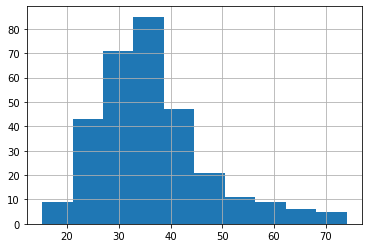

In [20]:
data.altitude.hist()

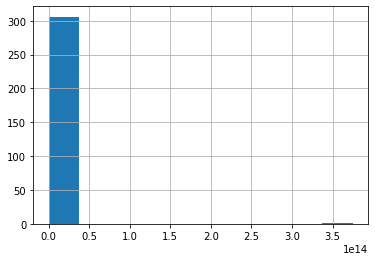

In [21]:
data.total_radiated_energy.hist()